In [1]:
import os
# Set working directory
os.chdir("D:/ACP")  # Windows path fix: use forward slash or raw string

print("Current Working Directory:", os.getcwd())

Current Working Directory: D:\ACP


In [2]:
import joblib
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt

In [4]:
# Step 2: Load the datasets (datasets were already splited and saved as csv files, 80,20 split)
train_data = pd.read_csv("acp_train_esm2_features.csv") #train data
test_data = pd.read_csv("acp_test_esm2_features.csv") #test data
# Step 3: Separate labels and features
y_train, X_train = train_data.iloc[:, 2], train_data.iloc[:, 3:] # third column: Label, # from fourth column onward: features
y_test, X_test = test_data.iloc[:, 2], test_data.iloc[:, 3:]

In [5]:
# === Step 2: Load pre-trained models ===
ada_model = joblib.load("best_adaboost_esm2_model.pkl")
xgb_model = joblib.load("best_xgb_esm2_model.pkl")
gb_model = joblib.load("best_gb_esm2_model.pkl")
svm_model = joblib.load("best_svm_esm2_model.pkl")

# === Step 3: Define Voting Classifier ===
voting_clf = VotingClassifier(
    estimators=[
        ('ada', ada_model),
        ('xgb', xgb_model),
        ('gb', gb_model),
        ('svm', svm_model) 
    ],
    voting='soft',  # Use soft voting to average predicted probabilities
    n_jobs= 1 ,
    verbose=2
)

# === Step 4: Train the voting classifier ===
voting_clf.fit(X_train, y_train)

# === Step 5: Evaluate on test data ===
y_test_pred = voting_clf.predict(X_test)
y_test_prob = voting_clf.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_test_prob))

[Voting] ...................... (1 of 4) Processing ada, total=   9.3s
[Voting] ...................... (2 of 4) Processing xgb, total=  10.0s
[Voting] ....................... (3 of 4) Processing gb, total= 1.3min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.3s
Test Accuracy: 82.70270270270271
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        91
           1       0.82      0.85      0.83        94

    accuracy                           0.83       185
   macro avg       0.83      0.83      0.83       185
weighted avg       0.83      0.83      0.83       185

Confusion Matrix:
 [[73 18]
 [14 80]]
ROC AUC Score: 0.8787701660042085


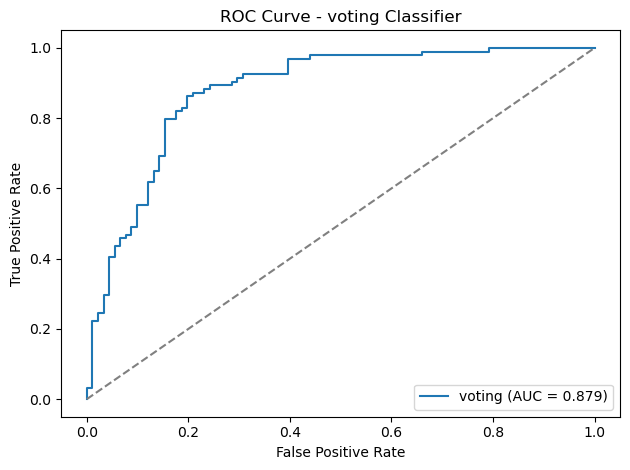

Precision: 0.8163265306122449
Recall: 0.851063829787234
F1 Score: 0.8333333333333334
Matthews Correlation Coefficient (MCC): 0.6543334319378625
Sensitivity (Recall): 0.851
Specificity: 0.802
[Voting] ...................... (1 of 4) Processing ada, total=   8.5s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.5s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.9s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.8s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.7s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.6s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.4s
[Voting] ...................... (1 of 4) Processing ada, total=   8.4s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.6s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.3s
[Voting] ...................... (1 of 4) Processing ada, total=   9.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.6s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.6s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.9s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.9s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.9s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.7s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.6s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   9.2s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.6s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.8s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.8s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
10-Fold Cross-Validation Accuracy Scores: [0.75675676 0.87837838 0.75675676 0.81081081 0.83783784 0.78378378
 0.90540541 0.71621622 0.82191781 0.8630137 ]
Mean 10-Fold CV Accuracy: 0.8130877452795261
Accuracy of each fold has been saved to 'cv_accuracies_voting_esm2.txt'
Mean Accuracy: 81.31
Mean AUC: 1.0000
[Voting] ...................... (1 of 4) Processing ada, total=   8.5s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.5s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   9.0s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.8s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.9s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.5s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.7s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.5s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.6s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.6s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.6s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.6s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.9s
[Voting] ...................... (2 of 4) Processing xgb, total=  10.0s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.7s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.7s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.8s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.8s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s
[Voting] ...................... (1 of 4) Processing ada, total=   8.6s
[Voting] ...................... (2 of 4) Processing xgb, total=   9.6s
[Voting] ....................... (3 of 4) Processing gb, total= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (4 of 4) Processing svm, total=   0.2s


ValueError: Format 'png_esm2' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

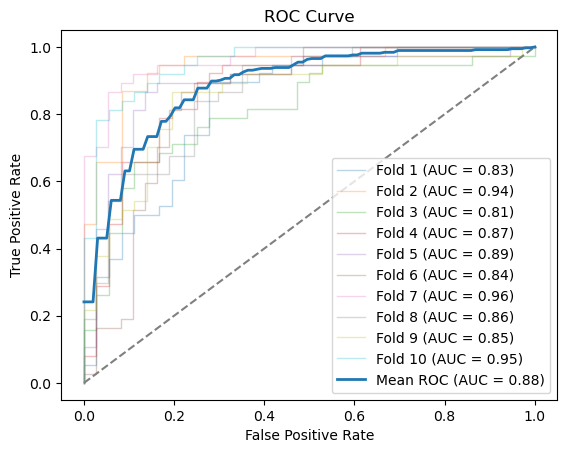

In [6]:
# === Step 7: Plot ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'voting (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - voting Classifier")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("voting_esm2_ROC_Curve.png", dpi=500)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
# Compute metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient (MCC):", mcc)

from sklearn.metrics import confusion_matrix

def compute_sensitivity_specificity(y_true, y_pred):
    """
    Computes sensitivity (recall) and specificity from y_true and y_pred.
    Assumes binary classification with labels 0 (negative) and 1 (positive).
    """
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0.0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0

    return sensitivity, specificity

# === Example usage ===
sensitivity, specificity = compute_sensitivity_specificity(y_test, y_test_pred)
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")

from sklearn.model_selection import GridSearchCV, cross_val_score
# Perform 10-fold cross-validation on the best model
cross_val_scores = cross_val_score(voting_clf, X_train, y_train, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean 10-Fold CV Accuracy:", cross_val_scores.mean())

# save accuracy of each fold to a text file
with open('cv_accuracies_voting_esm2.txt', 'w') as f:
    f.write("Cross-Validation Accuracies for each fold:\n")
    for i, score in enumerate(cross_val_scores):
        f.write(f"Fold {i+1} Accuracy: {score:.4f}\n")

print("Accuracy of each fold has been saved to 'cv_accuracies_voting_esm2.txt'")

import numpy as np
from sklearn.model_selection import StratifiedKFold
# make roc curve of all folds with mean auc and mean accuracy printed on the plot
mean_accuracy = cross_val_scores.mean() * 100
print(f"Mean Accuracy: {mean_accuracy:.2f}")
# Step 6: Generate ROC Curve
mean_auc = roc_auc_score(y_train, voting_clf.predict_proba(X_train)[:, 1])
print(f"Mean AUC: {mean_auc:.4f}")

cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for i, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
    voting_clf.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_prob = voting_clf.predict_proba(X_train.iloc[test_idx])[:, 1]
    fpr, tpr, _ = roc_curve(y_train.iloc[test_idx], y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("cv_roc_curve_voting.png_esm2", dpi=500)
plt.show()

#save the model
joblib.dump(voting_clf, "voting_esm2_classifier.pkl")